In [7]:
import numpy as np
import matplotlib.pyplot as plt
from math import erf, sqrt
import scipy
from types import LambdaType



# 1a 

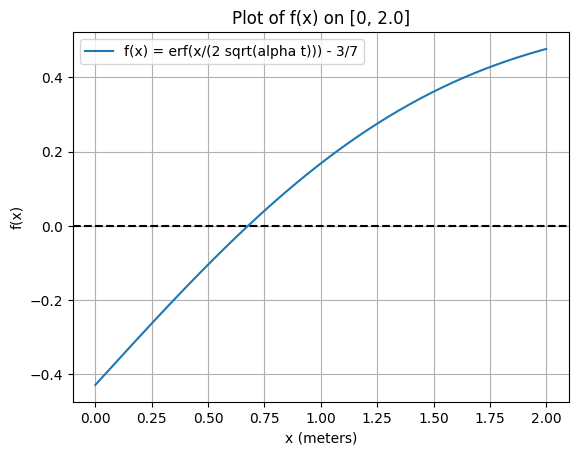

In [3]:
Ti = 20.0
Ts = -15.0
alpha = 0.138e-6  # m^2/s
days = 60
t = days * 24 * 3600  # seconds in 60 days

def f(x):
    return erf( x/(2.0*sqrt(alpha*t)) ) - 3.0/7.0

# Plot on [0, 2.0]
x_vals = np.linspace(0, 2, 300)
f_vals = [f(x) for x in x_vals]

plt.axhline(0, color='k', linestyle='--')  # y=0 line
plt.plot(x_vals, f_vals, label='f(x) = erf(x/(2 sqrt(alpha t))) - 3/7')
plt.xlabel('x (meters)')
plt.ylabel('f(x)')
plt.title('Plot of f(x) on [0, 2.0]')
plt.legend()
plt.grid(True)
plt.show()

# 1b) Bisection Method

In [9]:
def bisection(func: LambdaType, lower: float, upper: float, tolerance: float) -> list:
    f_lower = func(lower)
    f_upper = func(upper)

    if f_lower * f_upper > 0:
        return [lower, 1, 0]

    if f_lower == 0:
        return [lower, 0, 0]
    if f_upper == 0:
        return [upper, 0, 0]

    iterations = 0

    while (upper - lower) / 2 > tolerance:
        midpoint = (lower + upper) / 2.0
        f_mid = func(midpoint)
        iterations += 1

        if f_mid == 0:
            return [midpoint, 0, iterations]

        if f_lower * f_mid < 0:
            upper, f_upper = midpoint, f_mid
        else:
            lower, f_lower = midpoint, f_mid

    approx_root = (lower + upper) / 2.0
    return [approx_root, 0, iterations]

Ts = -15
Ti = 20
alpha = 0.138e-6
t = 60 * 60 * 24 * 60
f = lambda x: ((Ti - Ts) * scipy.special.erf(x / (2 * np.sqrt(alpha * t)))) + Ts

a = 0
b = 2

tol = 1e-13

[r,ier, count] = bisection(f,a,b,tol)
print('the number of iterations was ', count)
print('the approximate root is',r)
print('the error message reads:',ier)
print('f(astar) =', f(r))


the number of iterations was  44
the approximate root is 0.6769618544819309
the error message reads: 0
f(astar) = -1.1013412404281553e-13


# 1c Newton's Method

In [18]:
def newton(f, fp, p0, tol, Nmax):
    p = np.zeros(Nmax+1)
    p[0] = p0
    for it in range(Nmax):
        p1 = p0-f(p0)/fp(p0)
        # p1 = p0 - (3 * (f(p0) / fp(p0)))
        p[it+1] = p1
        if (abs(p1-p0) < tol):
            pstar = p1
            info = 0
            return [np.trim_zeros(p), pstar, info, it]
        p0 = p1
    pstar = p1
    info = 1
    return [p, pstar, info, it]


Ts = -15
Ti = 20
alpha = 0.138e-6
t = 60 * 60 * 24 * 60
f = lambda x: ((Ti - Ts) * scipy.special.erf(x / (2 * np.sqrt(alpha * t)))) + Ts
fp = lambda x: ((Ti - Ts) / np.sqrt(np.pi * alpha * t)) * np.exp(-(x**2)/(4*alpha*t))
#p0=0.01
p0 = 2


Nmax = 100
tol = 1e-13

(p,pstar,info,it) = newton(f,fp,p0,tol, Nmax)
print('the approximate root is', pstar)
print('the error message reads:', '%d' % info)
print('Number of iterations:', '%d' % it)


the approximate root is 0.6769618544819366
the error message reads: 0
Number of iterations: 6


# Question 4

In [19]:
def convergence(p, p_vector):
    index = 2
    error1 = abs(p_vector[p_vector.size - index] - p)
    while(error1 < 1e-4):
       index += 1
       error1 = abs(p_vector[p_vector.size - index] - p)
    error2 = abs(p_vector[p_vector.size - (index + 1)] - p)
    return np.log(error1) / np.log(error2)

In [26]:
def newton_standard(f, fp, p0, tol, Nmax):
    p = np.zeros(Nmax+1)
    p[0] = p0
    for it in range(Nmax):
        p1 = p0 - f(p0)/fp(p0)
        p[it+1] = p1
        if abs(p1 - p0) < tol:
            pstar = p1
            info = 0
            return np.trim_zeros(p), pstar, info, it
        p0 = p1
    pstar = p1
    info = 1
    return p, pstar, info, it


def newton_modified(f, fp, p0, tol, Nmax, m):
    p = np.zeros(Nmax+1)
    p[0] = p0
    for it in range(Nmax):
        p1 = p0 - m * (f(p0)/fp(p0))
        p[it+1] = p1
        if abs(p1 - p0) < tol:
            pstar = p1
            info = 0
            return np.trim_zeros(p), pstar, info, it
        p0 = p1
    pstar = p1
    info = 1
    return p, pstar, info, it


def newton_alternative(f, fp, fpp, p0, tol, Nmax):
    p = np.zeros(Nmax+1)
    p[0] = p0
    for it in range(Nmax):
        denom = fp(p0)**2 - f(p0)*fpp(p0)
        if denom == 0:
            print("Zero denominator. Stopping iteration.")
            info = 1
            pstar = p0
            return np.trim_zeros(p), pstar, info, it
        p1 = p0 - (f(p0)*fp(p0))/denom
        p[it+1] = p1
        if abs(p1 - p0) < tol:
            pstar = p1
            info = 0
            return np.trim_zeros(p), pstar, info, it
        p0 = p1
    pstar = p1
    info = 1
    return p, pstar, info, it


In [37]:

f = lambda x: np.exp(3 * x) - (27 * (x**6)) + (27 * (x**4) * np.exp(x)) - (9 * (x**2) * np.exp(2 * x))
fp = lambda x: 3 * (np.exp(x) - (6 * x)) * ((np.exp(x) - (3 * (x**2))) ** 2)
fpp = lambda x: 3 * (np.exp(x) - (3 * (x**2))) * ((90 * (x**2)) - (3 * np.exp(x) * ((x**2) + (8 * x) + 2)) + (3 * np.exp(2 * x)))
p0 = 3
Nmax = 100
tol = 1e-13



## Standard Newton's Method

In [38]:

print("Standard Newton's Method:")
(p_std, pstar_std, info_std, it_std) = newton_standard(f, fp, p0, tol, Nmax)
alpha_std = convergence(pstar_std, p_std)
print('The approximate root is', '%16.16e' % pstar_std)
print('The error message reads:', '%d' % info_std)
print('Number of iterations:', '%d' % it_std)
print('With approximate convergence of order:', alpha_std)


Standard Newton's Method:
The approximate root is 3.7330956674925440e+00
The error message reads: 0
Number of iterations: 27
With approximate convergence of order: 1.0524547395079755


## Modified Newton's Method

In [39]:
print("Modified Newton's Method (with known m=3):")
m = 3
(p_mod, pstar_mod, info_mod, it_mod) = newton_modified(f, fp, p0, tol, Nmax, m)
alpha_mod = convergence(pstar_mod, p_mod)
print('The approximate root is', '%16.16e' % pstar_mod)
print('The error message reads:', '%d' % info_mod)
print('Number of iterations:', '%d' % it_mod)
print('With approximate convergence of order:', alpha_mod)

Modified Newton's Method (with known m=3):
The approximate root is 3.7330645114200403e+00
The error message reads: 0
Number of iterations: 35
With approximate convergence of order: 0.5118809950268751


## Alternative Newton's Method

In [41]:
print("Alternative Newton's Method:")
(p_alt, pstar_alt, info_alt, it_alt) = newton_alternative(f, fp, fpp, p0, tol, Nmax)
alpha_alt = convergence(pstar_alt, p_alt)
print('The approximate root is', '%16.16e' % pstar_alt)
print('The error message reads:', '%d' % info_alt)
print('Number of iterations:', '%d' % it_alt)
print('With approximate convergence of order:', alpha_alt)

Alternative Newton's Method:
The approximate root is 3.7330656242115396e+00
The error message reads: 0
Number of iterations: 17
With approximate convergence of order: 2.0279842466295985


# Question 5

In [34]:

def secant(f, x0, x1, tol, Nmax):
    fx0 = f(x0)
    fx1 = f(x1)

    if (fx0 == 0):
        r = fx0
        ier = 0
        return [r, ier, 0]
    if (fx1 == 0):
        r = fx1
        ier = 0
        return [r, ier, 0]
    
    p = np.zeros(Nmax+1)
    p[0] = x1
    for it in range(Nmax):
        if (fx0 - fx1 == 0):
            ier = 1
            r = x1
            return [np.trim_zeros(p), r, ier, it]

        x2 = x1 - ((fx1 * (x1 - x0)) / (fx1 - fx0))
        p[it + 1] = x2
        if (abs(x2 - x1) < tol):
            r = x2
            ier = 0
            return [np.trim_zeros(p), r, ier, it]
        x0 = x1
        x1 = x2
        fx0 = f(x0)
        fx1 = f(x1)
    r = x1
    ier = 1
    return [p, r, 1, Nmax]

## Secant

In [48]:
f = lambda x: (x**6) - x - 1
x0 = 2
x1 = 1
(p_secant, r_secant, ier, count) = secant(f,x0,x1,tol, Nmax)
print('the approximate root is', '%16.16e' % r)
print('the error message reads:', '%d' % ier)
print('Number of iterations:', '%d' % count)

errors_secant = abs(p_secant - r_secant)
for error in errors_secant:
    print('{0:.16f}'.format(error))


the approximate root is 1.1347241384015194e+00
the error message reads: 0
Number of iterations: 8
0.1347241384015194
0.1185951061434549
0.0558536302751180
0.0170683074599678
0.0021925881853864
0.0000926696033334
0.0000004924528145
0.0000000001103035
0.0000000000000002
0.0000000000000000


## Newton

In [47]:
fp = lambda x: (6 * (x**5)) - 1
p0 = 2
Nmax = 100
tol = 1e-13

(p_newton ,pstar_newton,info,it) = newton(f,fp,p0,tol, Nmax)
alpha = convergence(pstar, p)
print('the approximate root is', '%16.16e' % pstar)
print('the error message reads:', '%d' % info)
print('Number of iterations:', '%d' % it)
print('With approximate convergence of order: ', alpha)

errors_newton = abs(p_newton - pstar_newton)
print('Errors:')
for error in errors_newton:
    print('{0:.16f}'.format(error))




the approximate root is 1.1347241384015194e+00
the error message reads: 0
Number of iterations: 8
With approximate convergence of order:  1.7739775178691108
Errors:
0.8652758615984806
0.5459041338497894
0.2960148498375430
0.1202468177079170
0.0268142943717937
0.0016291357689859
0.0000063899421097
0.0000000000987017
0.0000000000000000
0.0000000000000000


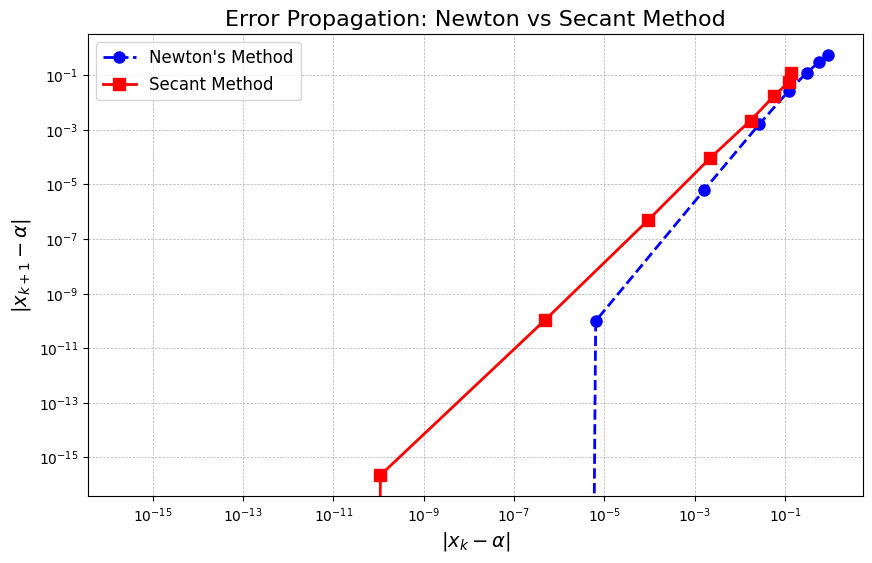

In [49]:
x_newton = errors_newton[:-1]
y_newton = errors_newton[1:]

x_secant = errors_secant[:-1]
y_secant = errors_secant[1:]

plt.figure(figsize=(10, 6))

plt.loglog(x_newton, y_newton, 'bo--', markersize=8, linewidth=2, label="Newton's Method")

plt.loglog(x_secant, y_secant, 'rs-', markersize=8, linewidth=2, label="Secant Method")

plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.xlabel(r'$|x_k - \alpha|$', fontsize=14)
plt.ylabel(r'$|x_{k+1} - \alpha|$', fontsize=14)
plt.title("Error Propagation: Newton vs Secant Method", fontsize=16)
plt.legend(fontsize=12)

plt.show()